In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats
from arch import arch_model
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

### 原始价格时间序列图

ADF统计量: -1.540436400008197
p值: 0.5134217108255927
临界值:
  1%: -3.432396452993246
  5%: -2.86244419883287
  10%: -2.567251325316284


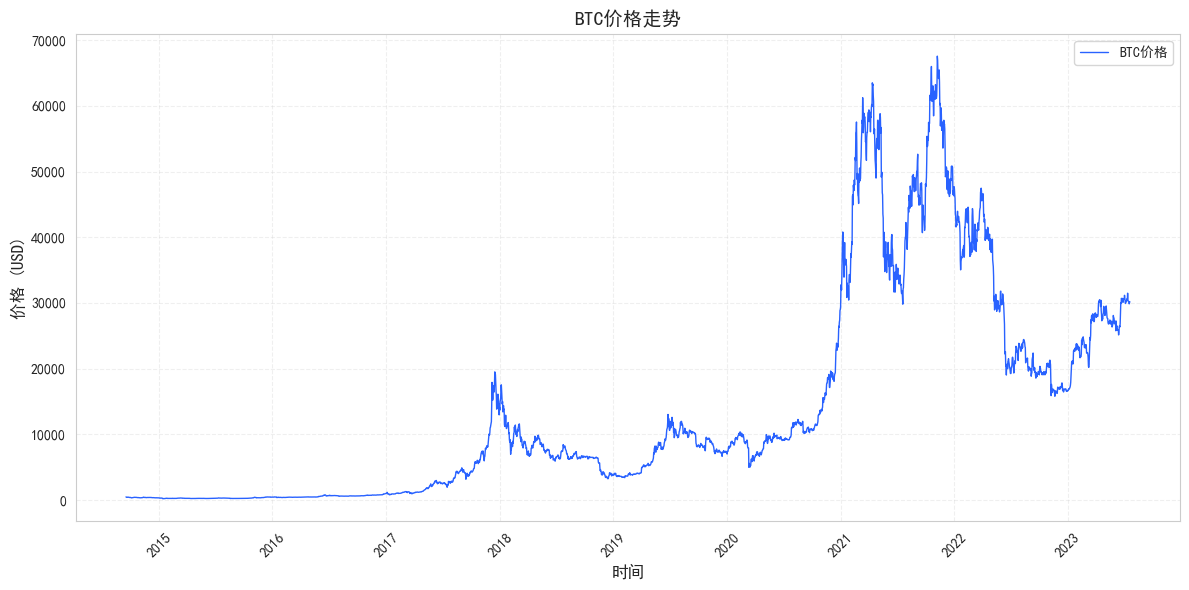

In [2]:
# 读取数据
df = pd.read_csv('data/BTC-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])

# 进行ADF检验
adf_result = adfuller(df['Close'])
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

# 输出ADF检验结果
print("ADF统计量:", adf_statistic)
print("p值:", p_value)
print("临界值:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

# 创建图形
plt.figure(figsize=(12, 6), facecolor='white')
# 绘制价格线
plt.plot(df['Date'], df['Close'], color='#2962FF', linewidth=1, label='BTC价格')
# 设置标题和标签
plt.title('BTC价格走势', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('价格 (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('img/BTC价格原始时间序列.png')
plt.show()


In [26]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3228,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3.228000e+03
mean,2019-02-16 12:00:26.765799424,13664.725548,13997.728538,13300.725867,13672.568197,13672.568197,1.656613e+10
min,2014-09-17 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,2016-12-01 18:00:00,762.625244,773.658493,750.296265,764.113251,764.113251,1.304910e+08
50%,2019-02-16 12:00:00,7688.712403,7915.482666,7511.864746,7697.924072,7697.924072,1.019161e+10
75%,2021-05-03 06:00:00,20282.866699,20754.581543,19902.022949,20297.028808,20297.028808,2.742777e+10
max,2023-07-20 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11
std,NaN,16018.010041,16418.141665,15561.618968,16015.763332,16015.763332,1.949084e+10


### 对数时间序列图

ADF统计量: -0.9070918212007841
p值: 0.7856280083914862
临界值:
  1%: -3.432378047525015
  5%: -2.862436069383185
  10%: -2.5672469973560355


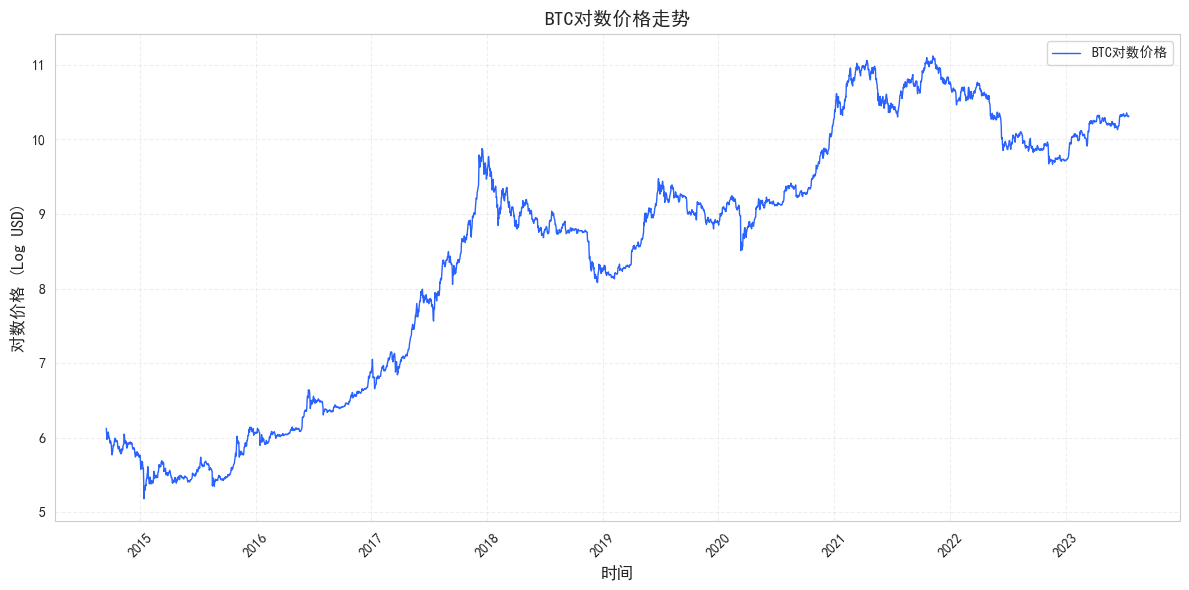

In [3]:
# 读取数据
df = pd.read_csv('data/BTC-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])

# 对价格取对数
df['Log_Close'] = np.log(df['Close'])

# 进行ADF检验
adf_result = adfuller(df['Log_Close'])
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

# 输出ADF检验结果
print("ADF统计量:", adf_statistic)
print("p值:", p_value)
print("临界值:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

# 创建图形
plt.figure(figsize=(12, 6), facecolor='white')
# 绘制对数价格线
plt.plot(df['Date'], df['Log_Close'], color='#2962FF', linewidth=1, label='BTC对数价格')
# 设置标题和标签
plt.title('BTC对数价格走势', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('对数价格 (Log USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('img/BTC对数价格时间序列.png')
plt.show()

In [28]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Log_Close
count,3228,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3.228000e+03,3228.000000
mean,2019-02-16 12:00:26.765799424,13664.725548,13997.728538,13300.725867,13672.568197,13672.568197,1.656613e+10,8.483919
min,2014-09-17 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06,5.182362
25%,2016-12-01 18:00:00,762.625244,773.658493,750.296265,764.113251,764.113251,1.304910e+08,6.638716
50%,2019-02-16 12:00:00,7688.712403,7915.482666,7511.864746,7697.924072,7697.924072,1.019161e+10,8.948705
75%,2021-05-03 06:00:00,20282.866699,20754.581543,19902.022949,20297.028808,20297.028808,2.742777e+10,9.918230
max,2023-07-20 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11,11.120872
std,NaN,16018.010041,16418.141665,15561.618968,16015.763332,16015.763332,1.949084e+10,1.752911


无论原始价格序列差分与否，从p值判断（都大于0.05），所以都能得出，该序列绝对不平稳，所以需要进行差分处理。
我采取对原始时间序列进行差分，然后对白噪声进行检验

ADF Statistic: -9.515779426095047
p-value: 3.160120153308401e-16
Critical Values:
   1%: -3.432396452993246
   5%: -2.86244419883287
   10%: -2.567251325316284


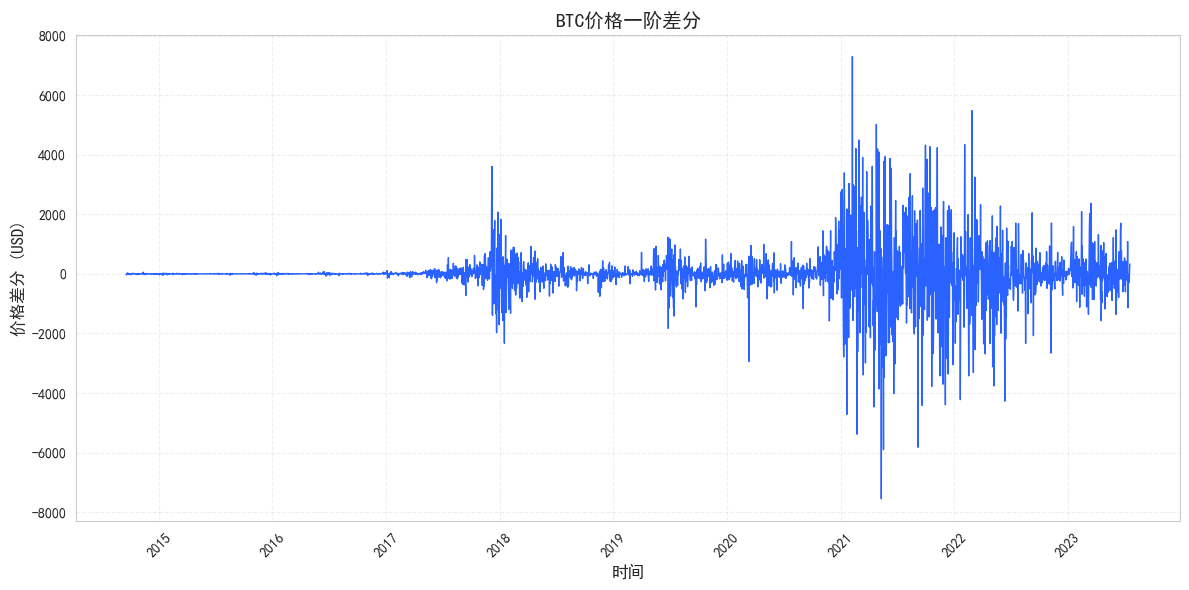

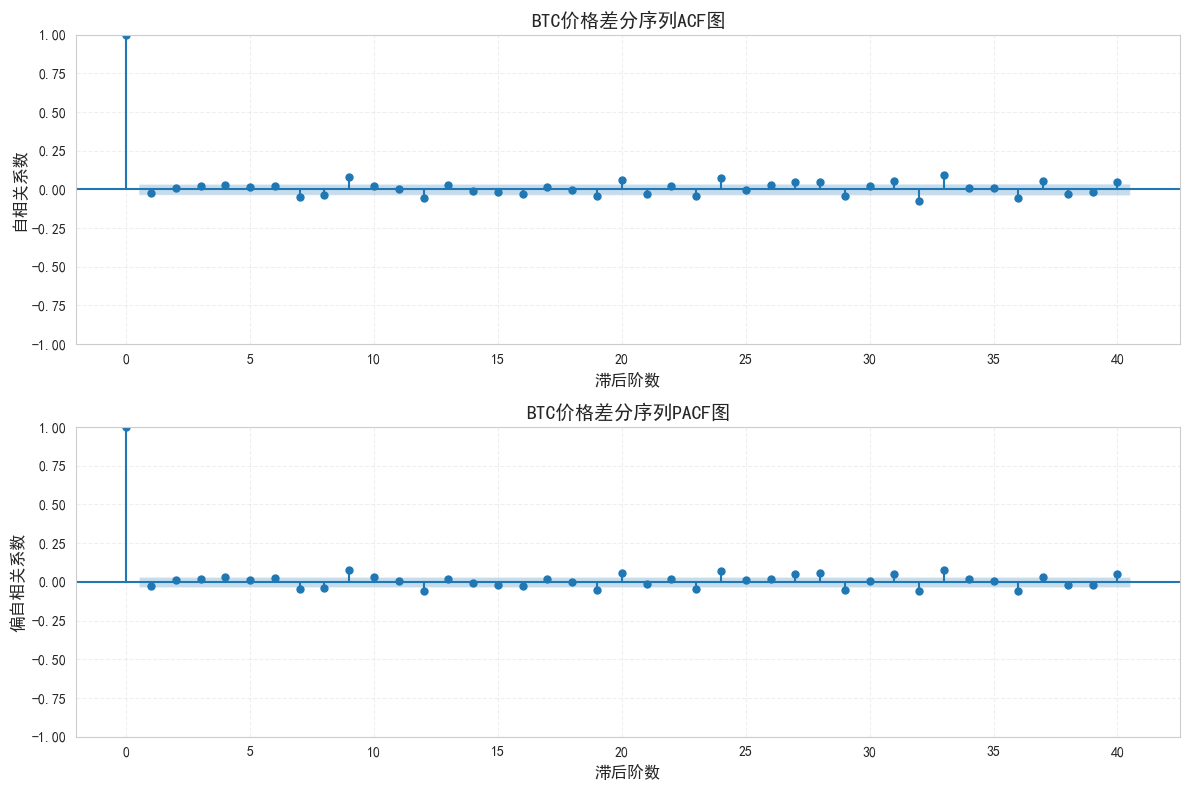

In [10]:
# 进行一阶差分
df['diff_price'] = df['Close'].diff()


# ADF检验，包含截距项
adf_result = adfuller(df['diff_price'].dropna(), regression='c')

# 打印ADF检验结果
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# 绘制差分后的图
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['diff_price'], color='#2962FF', linewidth=1)
plt.title('BTC价格一阶差分', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('价格差分 (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('img/BTC价格一阶差分.png')
plt.show()

# 创建子图展示ACF和PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# 绘制ACF图
plot_acf(df['diff_price'].dropna(), lags=40, alpha=0.05, ax=ax1)
ax1.set_title('BTC价格差分序列ACF图', fontsize=14)
ax1.set_xlabel('滞后阶数', fontsize=12)
ax1.set_ylabel('自相关系数', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.3)

# 绘制PACF图
plot_pacf(df['diff_price'].dropna(), lags=40, alpha=0.05, ax=ax2)
ax2.set_title('BTC价格差分序列PACF图', fontsize=14)
ax2.set_xlabel('滞后阶数', fontsize=12)
ax2.set_ylabel('偏自相关系数', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.3)

# 调整子图间距
plt.tight_layout()

# 保存图片
plt.savefig('img/BTC价格差分ACF_PACF图.png')
plt.show()

### 白噪声检验

In [11]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# 进行LB检验
lb_test = acorr_ljungbox(df['diff_price'].dropna(), lags=[5 ,10, 15, 20, 30], return_df=True)

# 打印检验结果
print("Ljung-Box白噪声检验结果：")
print("=" * 50)
print(lb_test)
print("\n检验结论：")
for idx, p_value in enumerate(lb_test['lb_pvalue']):
    lag = lb_test.index[idx]
    if p_value < 0.05:
        print(f"滞后{lag}阶：p值为{p_value:.4f} < 0.05，拒绝原假设，序列不是白噪声")
    else:
        print(f"滞后{lag}阶：p值为{p_value:.4f} > 0.05，不能拒绝原假设，序列可能是白噪声")

Ljung-Box白噪声检验结果：
       lb_stat     lb_pvalue
5     7.007393  2.200910e-01
10   44.079144  3.185648e-06
15   57.500986  6.746410e-07
20   78.631713  6.693740e-09
30  131.330756  1.219435e-14

检验结论：
滞后5阶：p值为0.2201 > 0.05，不能拒绝原假设，序列可能是白噪声
滞后10阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声
滞后15阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声
滞后20阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声
滞后30阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声


### 接下来进行模型构建与残差处理

#### ARIMA部分

开始ARIMA模型分析...
计算ESACF表...

ESACF表 (x: 显著相关, o: 不显著相关)
   MA阶数
AR     0   1   2   3   4   5   6   7   8   9  10  11  12
阶  ----------------------------------------------------
 0 |x   x   x   x   x   x   x   x   x   x   x   x   x   
 1 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 2 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 3 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 4 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 5 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 6 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 7 |o   o   o   o   o   o   x   x   x   o   o   x   o   

建议的ARIMA阶数:
ARIMA(1, 1, 0)
ARIMA(1, 1, 1)
ARIMA(1, 1, 2)
ARIMA(1, 1, 3)
ARIMA(1, 1, 4)

评估建议的模型...

ARIMA(1, 1, 0):
AIC: 52183.09
BIC: 52195.25
参数显著: 是

ARIMA(1, 1, 1):
AIC: 52185.01
BIC: 52203.25
参数显著: 否

ARIMA(1, 1, 2):
AIC: 52183.85
BIC: 52208.17
参数显著: 是

ARIMA(1, 1, 3):
AIC: 52184.83
BIC: 52215.23
参数显著: 否

ARIMA(1, 1, 4):
AIC: 52186.26
BIC: 52222.73
参数显著: 否

最优

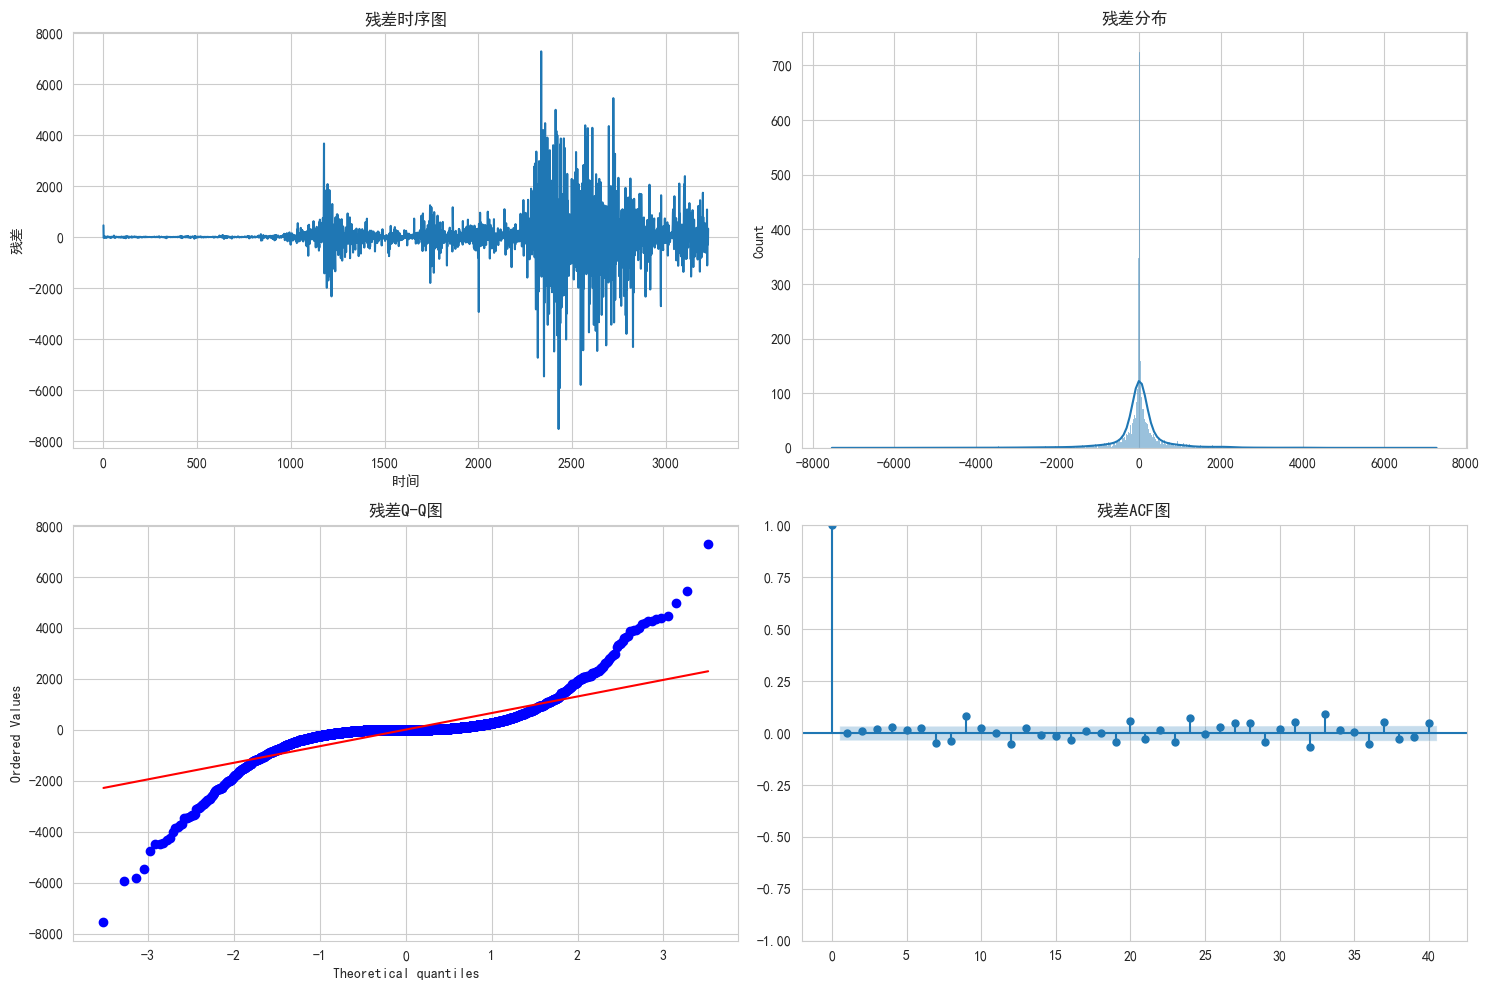


异方差性检验:
White检验p值: nan

ARCH效应检验:
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3507      0.293      1.195      0.232 [ -0.224,  0.926]

正态性检验:
Jarque-Bera检验p值: 0.0000
Shapiro-Wilk检验p值: 0.0000

检测到非正态性，使用Box-Cox转换...

Box-Cox转换使用的lambda值: 1.3090


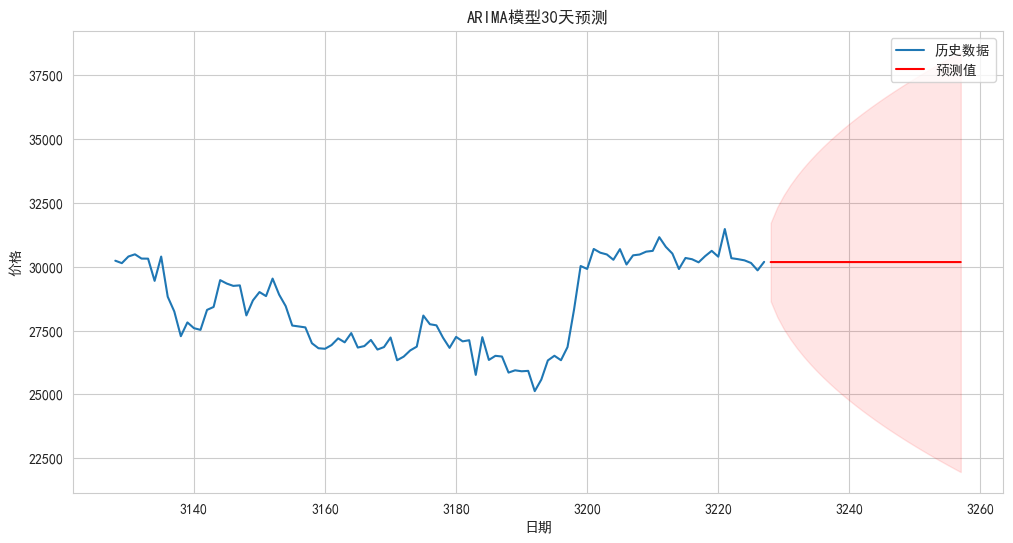

In [14]:
# 模型构建与残差处理
# 导入自定义的分析器类
from ARIMAAnalyzerWithESACF import ARIMAAnalyzerWithESACF
from ResidualAnalyzer import ResidualAnalyzer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# 1. ARIMA分析
print("开始ARIMA模型分析...")
arima_analyzer = ARIMAAnalyzerWithESACF()
ESACF_matrix = arima_analyzer.compute_ESACF(df['Close'])
arima_analyzer.print_ESACF_table(ESACF_matrix)
suggested_orders = arima_analyzer.suggest_orders(ESACF_matrix)

print("\n建议的ARIMA阶数:")
for order in suggested_orders:
    print(f"ARIMA{order}")

# 2. 拟合最优模型
best_model = None
best_aic = float('inf')
best_params = None

print("\n评估建议的模型...")
for order in suggested_orders:
    try:
        # 拟合模型
        model = ARIMA(df['Close'], order=order)
        results = model.fit()

        # 检查参数显著性
        significant = all(p_value < 0.05 for p_value in results.pvalues)

        print(f"\nARIMA{order}:")
        print(f"AIC: {results.aic:.2f}")
        print(f"BIC: {results.bic:.2f}")
        print(f"参数显著: {'是' if significant else '否'}")

        if results.aic < best_aic and significant:
            best_aic = results.aic
            best_model = results
            best_params = order

    except Exception as e:
        print(f"ARIMA{order} 拟合失败: {str(e)}")
        continue

if best_model is not None:
    print("\n最优模型:")
    print(f"ARIMA{best_params}")
    print(best_model.summary())

    # 预测误差评估
    actual_values = df['Close'][-30:]
    forecast = best_model.get_forecast(steps=30)
    forecast_mean = forecast.predicted_mean

    # 计算预测误差指标
    mse = mean_squared_error(actual_values, forecast_mean)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(actual_values, forecast_mean)
    mape = np.mean(np.abs((actual_values - forecast_mean) / actual_values)) * 100

    print('\nARIMA预测误差评估指标:')
    print(f'MSE (均方误差): {mse:.2f}')
    print(f'RMSE (均方根误差): {rmse:.2f}')
    print(f'MAE (平均绝对误差): {mae:.2f}')
    print(f'MAPE (平均绝对百分比误差): {mape:.2f}%')

    # 3. 残差分析
    print("\n开始残差分析...")
    resid_analyzer = ResidualAnalyzer(best_model, df['Close'])

    # 绘制残差诊断图
    resid_analyzer.plot_residual_diagnostics()

    # 检查异方差性和正态性
    has_heteroskedasticity = resid_analyzer.check_heteroskedasticity()
    non_normal = resid_analyzer.check_normality()

    # 处理残差（如果需要）
    if has_heteroskedasticity:
        print("\n检测到异方差性，使用GARCH模型处理...")
        standardized_resid = resid_analyzer.apply_garch()

    if non_normal:
        print("\n检测到非正态性，使用Box-Cox转换...")
        transformed_resid = resid_analyzer.box_cox_transform()

    # 保存预测结果图
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-100:], df['Close'][-100:], label='历史数据')
    plt.plot(forecast_mean.index, forecast_mean, label='预测值', color='red')
    forecast_ci = forecast.conf_int()
    plt.fill_between(forecast_ci.index,
                     forecast_ci.iloc[:, 0],
                     forecast_ci.iloc[:, 1],
                     color='r', alpha=0.1)
    plt.title('ARIMA模型30天预测')
    plt.xlabel('日期')
    plt.ylabel('价格')
    plt.legend()
    plt.grid(True)
    plt.savefig('img/ARIMA预测结果.png')
    plt.show()

else:
    print("未找到合适的模型")

#### SARIMA

开始SARIMA模型选择...
季节性周期: 14天(双周)、30天(月)

最优SARIMA模型:
SARIMA(0, 1, 1)x(0, 1, 1, 30)

模型摘要:
                                     SARIMAX Results                                      
Dep. Variable:                           LogClose   No. Observations:                 3228
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 30)   Log Likelihood                5804.037
Date:                            Fri, 08 Nov 2024   AIC                         -11602.073
Time:                                    00:39:07   BIC                         -11583.893
Sample:                                         0   HQIC                        -11595.552
                                           - 3228                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0181     

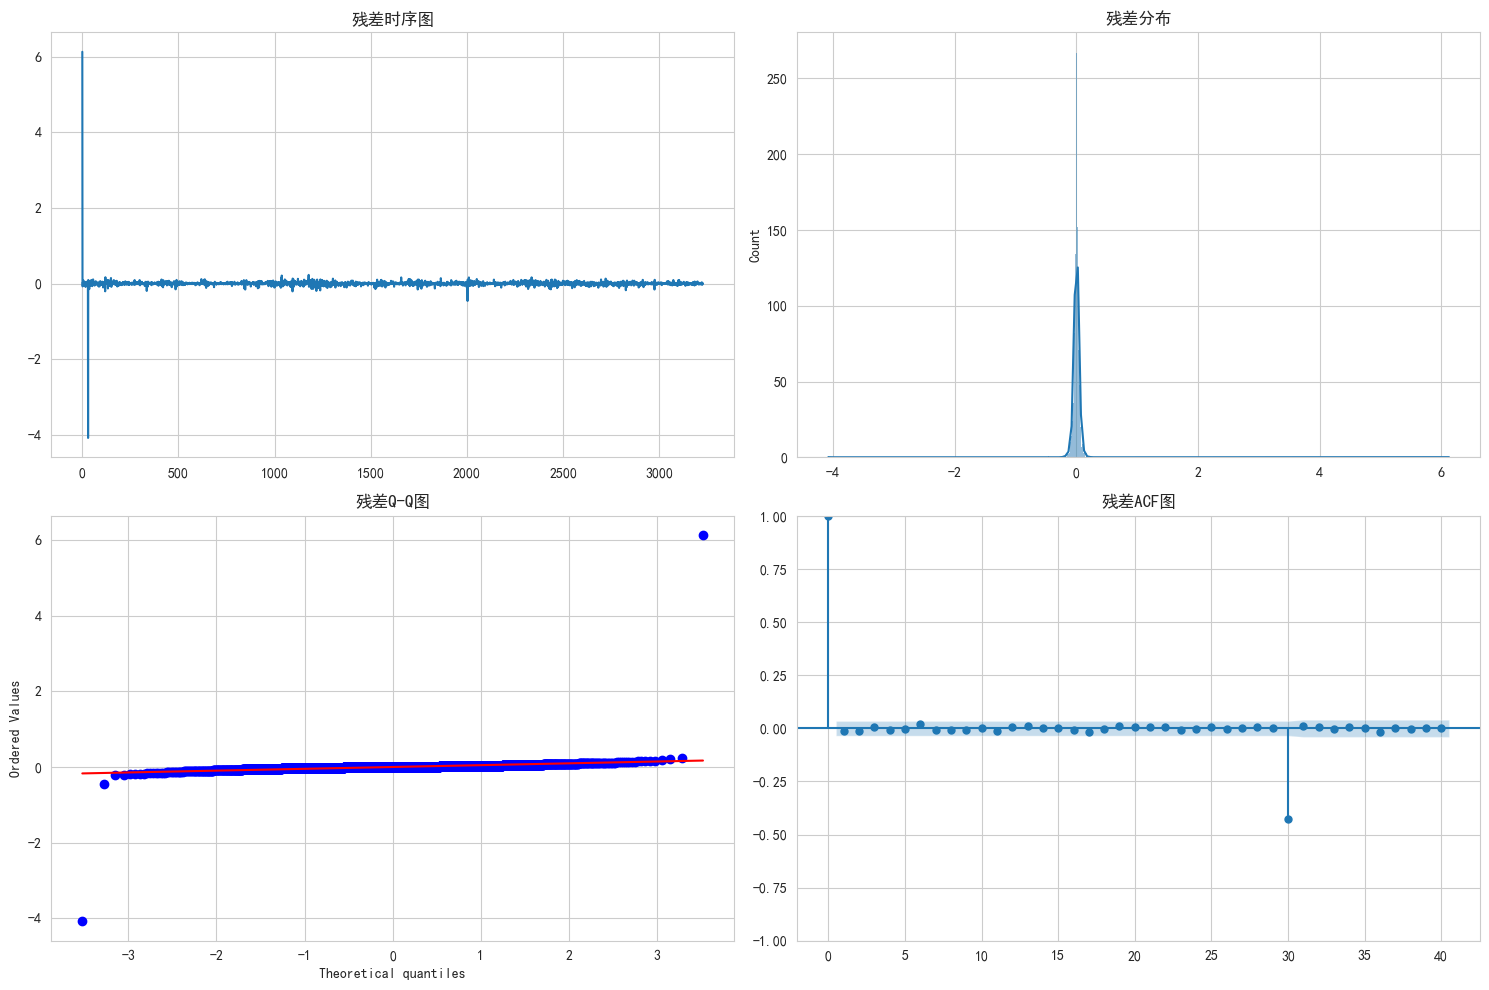


残差诊断检验:

Ljung-Box检验:
       lb_stat      lb_pvalue
10    3.255997   9.747416e-01
15    4.250372   9.967950e-01
20    5.487744   9.994334e-01
30  597.257054  1.095183e-106

Jarque-Bera检验 p值: 0.0000

ARCH效应检验:
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.8607e-04  3.904e-04      2.526  1.154e-02 [2.209e-04,1.751e-03]

预测误差评估指标:
MSE (均方误差): 413230.63
RMSE (均方根误差): 642.83
MAE (平均绝对误差): 501.24
MAPE (平均绝对百分比误差): nan%


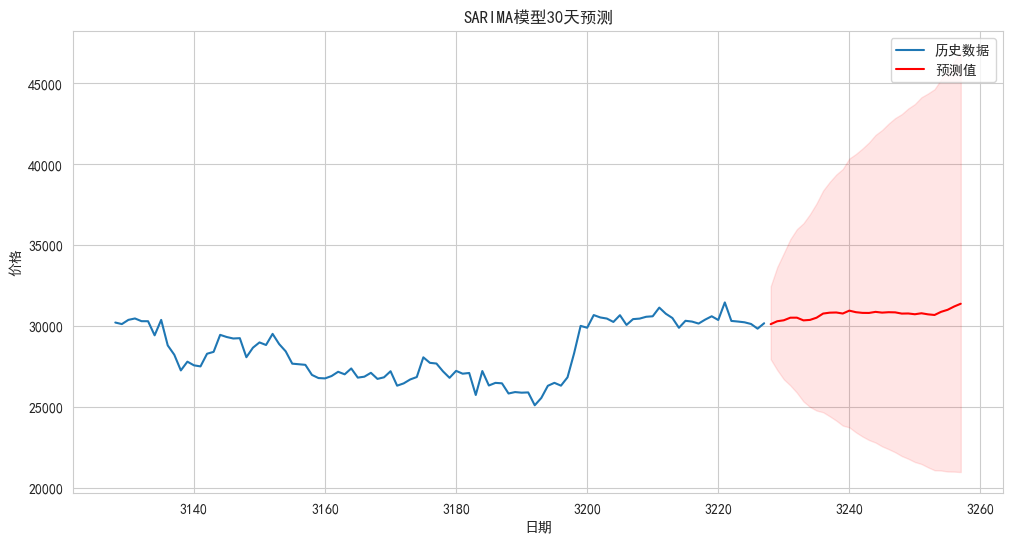


检测到ARCH效应，开始SARIMA-GARCH建模...

尝试拟合EGARCH模型...
EGARCH模型拟合成功!

EGARCH建模失败，错误信息: Analytic forecasts not available for horizon > 1

切换到标准GARCH(1,1)模型...
GARCH(1,1)模型拟合成功!

GARCH模型摘要:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5141.16
Distribution:                  Normal   AIC:                          -10274.3
Method:            Maximum Likelihood   BIC:                          -10250.0
                                        No. Observations:                 3228
Date:                Fri, Nov 08 2024   Df Residuals:                     3227
Time:                        00:39:10   Df Model:                            1
                                 Mean Model                                 
                 coef    std er

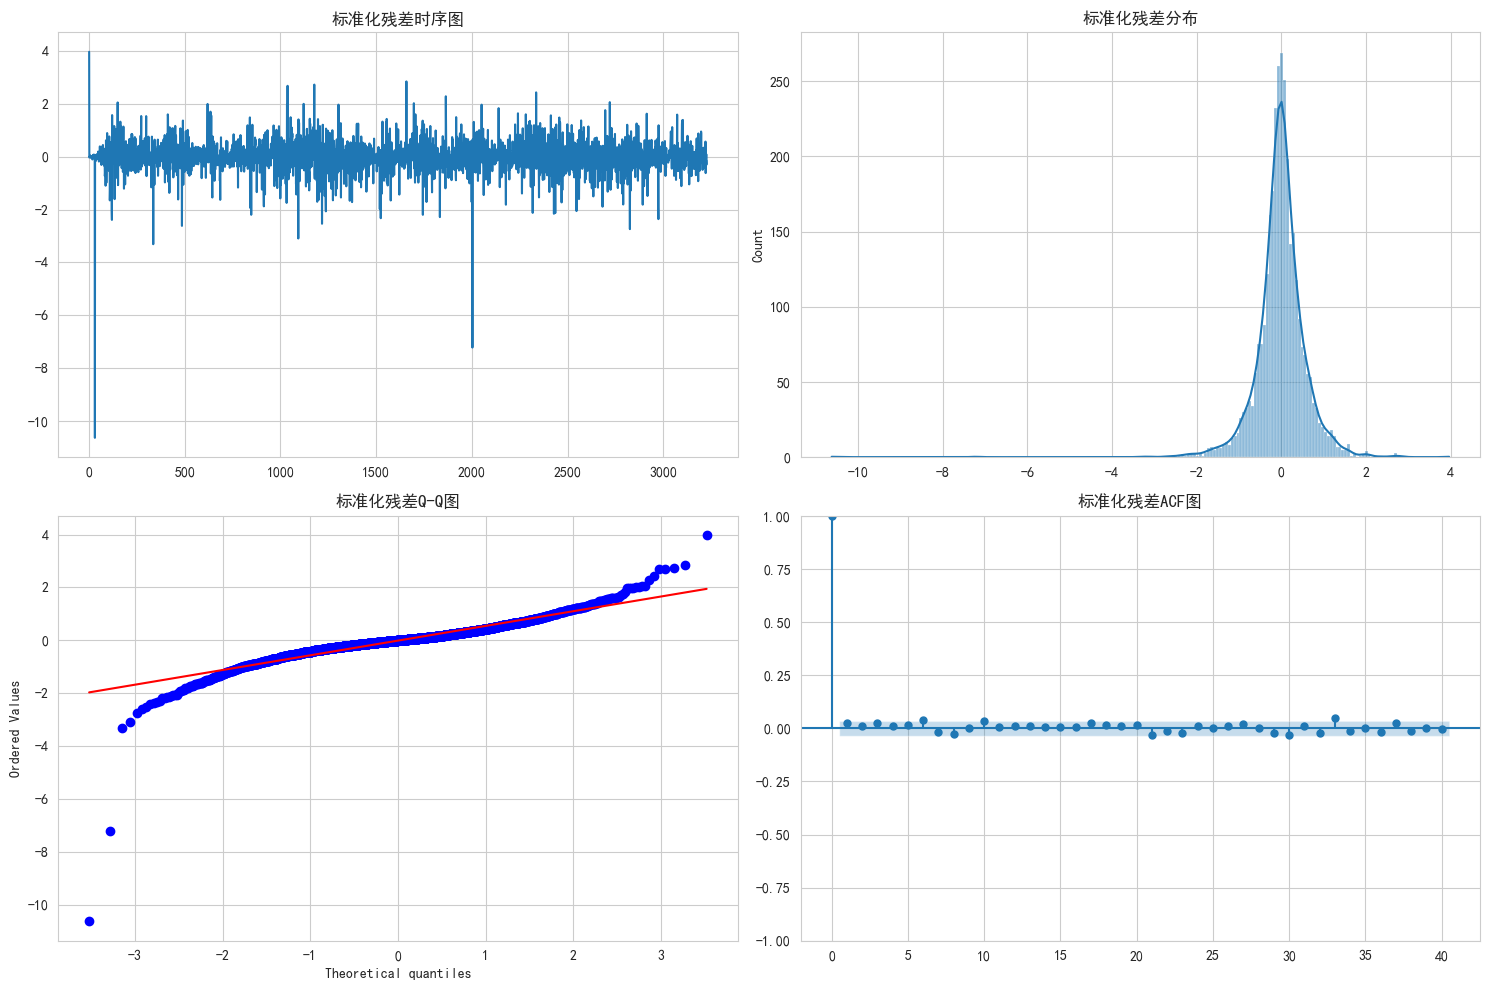


SARIMA-GARCH组合模型残差诊断:

Ljung-Box检验 (标准化残差):
      lb_stat  lb_pvalue
10  17.365789   0.066652
15  18.514205   0.236597
20  23.495864   0.265107
30  35.469532   0.225958

Jarque-Bera检验 p值 (标准化残差): 0.0000

Ljung-Box检验 (标准化残差平方):
      lb_stat  lb_pvalue
10   0.464488   0.999995
15   0.591965   1.000000
20   0.805221   1.000000
30  34.053520   0.278698

在执行GARCH模型分析过程中出现错误: operands could not be broadcast together with shapes (30,) (3258,) 
请检查数据和模型设置。


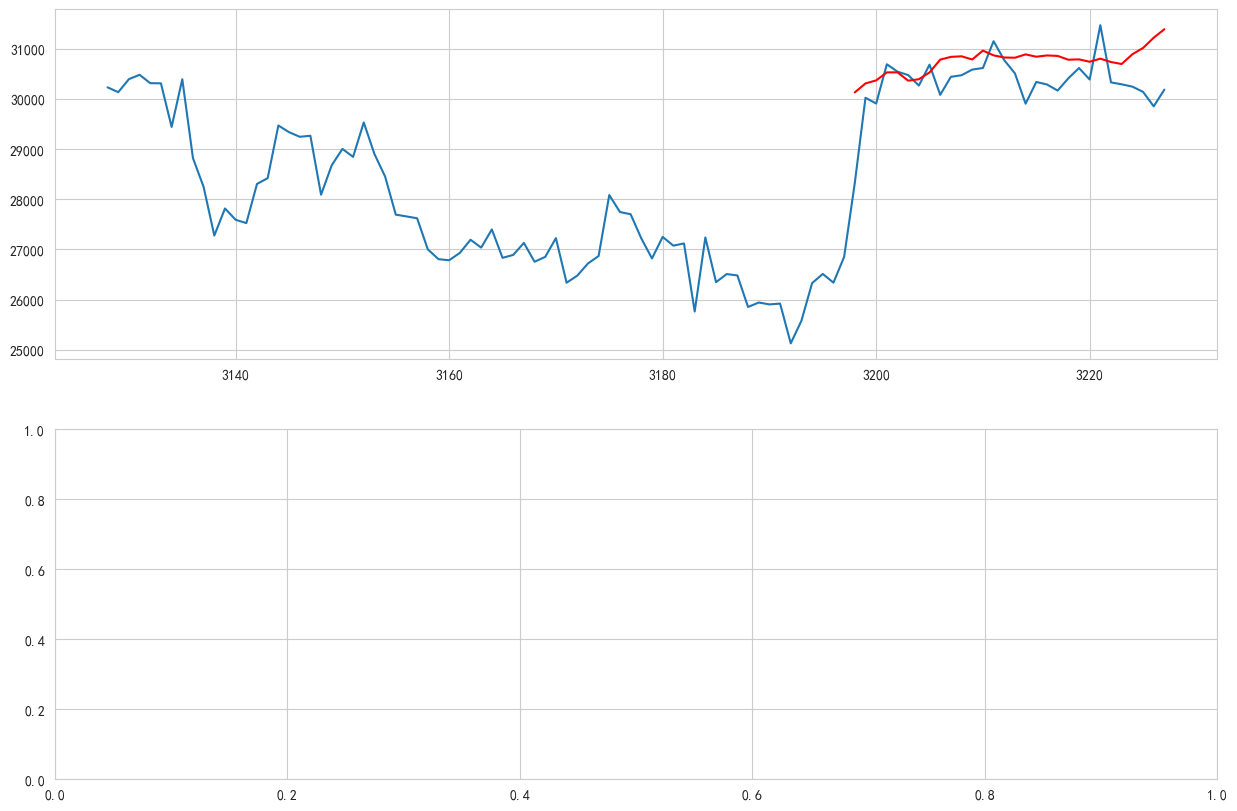

In [12]:
# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model
import scipy.stats as stats
import numpy as np
import pandas as pd
import itertools
%matplotlib inline

# 转换价格为对数价格
df['LogClose'] = np.log(df['Close'])

# 定义季节性周期
seasonal_periods = [14, 30]  # 周、双周、月度

# 定义SARIMA参数范围
p = d = q = range(0, 2)
P = D = Q = range(0, 2)

best_model = None
best_aic = np.inf
best_params = None
best_season = None

print("开始SARIMA模型选择...")
print("季节性周期: 14天(双周)、30天(月)")
'''
# 对每个季节性周期进行网格搜索
for s in seasonal_periods:
    print(f"\n测试季节性周期 {s} 天...")

    # 创建参数组合
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = list(itertools.product(P, D, Q))

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                # 构建完整的季节性参数
                seasonal_order = param_seasonal + (s,)

                # 拟合模型
                model = SARIMAX(df['LogClose'],  # 使用对数价格
                                order=param,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

                results = model.fit(disp=False)

                # 检查参数显著性
                significant = all(p_value < 0.05 for p_value in results.pvalues)

                if results.aic < best_aic and significant:
                    best_aic = results.aic
                    best_model = results
                    best_params = param
                    best_season = seasonal_order

                print(f'SARIMA{param}x{seasonal_order} - AIC:{results.aic:.2f}, 参数显著:{significant}')

            except Exception as e:
                continue
'''
# 直接指定SARIMA模型参数
order = (0, 1, 1)           # 非季节性部分 (p,d,q)
seasonal_order = (0, 1, 1, 30)  # 季节性部分 (P,D,Q,s)

# 构建并拟合模型
model = SARIMAX(df['LogClose'],  # 使用对数价格
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

best_model = model.fit(disp=False)
# 更新最优参数
best_params = order
best_season = seasonal_order

if best_model is not None:
    print('\n最优SARIMA模型:')
    print(f'SARIMA{best_params}x{best_season}')
    print('\n模型摘要:')
    print(best_model.summary())

    # 残差分析
    resid = best_model.resid

    # 1. 绘制残差诊断图
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # 残差时序图
    ax1.plot(resid)
    ax1.set_title('残差时序图')

    # 残差直方图
    sns.histplot(resid, kde=True, ax=ax2)
    ax2.set_title('残差分布')

    # Q-Q图
    stats.probplot(resid, dist="norm", plot=ax3)
    ax3.set_title('残差Q-Q图')

    # ACF图
    plot_acf(resid, ax=ax4, lags=40)
    ax4.set_title('残差ACF图')

    plt.tight_layout()
    plt.savefig('img/ARIMA残差分析.png')
    plt.show()

    # 2. 进行诊断检验
    print('\n残差诊断检验:')

    # Ljung-Box检验
    lb_test = acorr_ljungbox(resid, lags=[10, 15, 20, 30])
    print("\nLjung-Box检验:")
    print(lb_test)

    # Jarque-Bera检验
    jb_test = stats.jarque_bera(resid)
    print(f"\nJarque-Bera检验 p值: {jb_test[1]:.4f}")

    # ARCH效应检验
    arch_model_test = arch_model(resid)
    arch_result = arch_model_test.fit(disp='off')
    print("\nARCH效应检验:")
    print(arch_result.summary().tables[1])

    # 3. 模型预测
    forecast = best_model.get_forecast(steps=30)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # 将对数预测转换回原始价格尺度
    forecast_mean = np.exp(forecast_mean)
    forecast_ci = np.exp(forecast_ci)

    actual_values = df['Close'][-30:]  # 使用原始价格进行评估

    # 计算预测误差指标
    mse = mean_squared_error(actual_values, forecast_mean)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(actual_values, forecast_mean)
    mape = np.mean(np.abs((actual_values - forecast_mean) / actual_values)) * 100

    print('\n预测误差评估指标:')
    print(f'MSE (均方误差): {mse:.2f}')
    print(f'RMSE (均方根误差): {rmse:.2f}')
    print(f'MAE (平均绝对误差): {mae:.2f}')
    print(f'MAPE (平均绝对百分比误差): {mape:.2f}%')

    # 绘制预测结果
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-100:], df['Close'][-100:], label='历史数据')
    plt.plot(forecast_mean.index, forecast_mean, label='预测值', color='red')
    plt.fill_between(forecast_ci.index,
                     forecast_ci.iloc[:, 0],
                     forecast_ci.iloc[:, 1],
                     color='r', alpha=0.1)
    plt.title('SARIMA模型30天预测')
    plt.xlabel('日期')
    plt.ylabel('价格')
    plt.legend()
    plt.grid(True)
    plt.savefig('img/SARIMA预测结果.png')
    plt.show()

# SARIMA-GARCH组合建模部分
# SARIMA-GARCH组合建模部分
if arch_result.pvalues[-1] < 0.05:  # 检查是否存在ARCH效应
    print("\n检测到ARCH效应，开始SARIMA-GARCH建模...")

    try:
        # 首先尝试EGARCH模型
        print("\n尝试拟合EGARCH模型...")
        egarch_model = arch_model(resid,
                                  vol='EGARCH',    # 使用EGARCH模型
                                  p=1,             # GARCH阶数
                                  o=1,             # 杠杆效应项
                                  q=1,             # ARCH阶数
                                  dist='skewt',    # 使用偏t分布
                                  rescale=True)    # 重缩放以提高稳定性

        # 拟合EGARCH模型
        garch_results = egarch_model.fit(disp='off')
        model_type = "EGARCH"
        print("EGARCH模型拟合成功!")

        # 获取预测所需的数据
        forecast = best_model.get_forecast(steps=30)
        forecast_mean = np.exp(forecast.predicted_mean)  # 转换回原始尺度

        # 获取实际值 - 确保只取最后30个值
        actual_values = df['Close'].iloc[-30:].values  # 转换为numpy数组

        # EGARCH预测 - 指定正确的开始索引
        start_loc = len(resid) - 30  # 从倒数第30个观测开始
        garch_forecast = garch_results.forecast(start=start_loc, horizon=30)
        volatility_forecast = np.sqrt(garch_forecast.variance.mean(axis=1))[-30:]  # 只取最后30个预测值

        # 计算考虑波动率的SARIMA-EGARCH预测
        combined_forecast = forecast_mean * np.exp(0.5 * volatility_forecast**2)

        # 现在执行预测评估
        def evaluate_forecast_accuracy(actual, forecast, model_name=""):
            """评估预测精度的函数"""
            # 确保长度匹配
            min_len = min(len(actual), len(forecast))
            actual = actual[:min_len]
            forecast = forecast[:min_len]

            mse = mean_squared_error(actual, forecast)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(actual, forecast)
            mape = np.mean(np.abs((actual - forecast) / actual)) * 100

            print(f"\n{model_name}预测精度评估:")
            print(f"MSE (均方误差): {mse:.4f}")
            print(f"RMSE (均方根误差): {rmse:.4f}")
            print(f"MAE (平均绝对误差): {mae:.4f}")
            print(f"MAPE (平均绝对百分比误差): {mape:.4f}%")

            return {
                'mse': mse,
                'rmse': rmse,
                'mae': mae,
                'mape': mape
            }

        # 评估SARIMA预测
        sarima_metrics = evaluate_forecast_accuracy(
            actual_values,
            forecast_mean,
            "SARIMA"
        )

        # 评估SARIMA-EGARCH组合预测
        combined_metrics = evaluate_forecast_accuracy(
            actual_values,
            combined_forecast,
            "SARIMA-EGARCH"
        )

        # 绘制预测比较图
        plt.figure(figsize=(12, 6))
        plt.plot(actual_values, label='实际值', color='black')
        plt.plot(forecast_mean, label='SARIMA预测', color='blue')
        plt.plot(combined_forecast, label='SARIMA-EGARCH预测', color='red')
        plt.title('预测比较')
        plt.xlabel('预测期数')
        plt.ylabel('价格')
        plt.legend()
        plt.grid(True)
        plt.savefig('img/SARIMA-EGARCH预测比较.png')
        plt.show()

    except Exception as e:
        print(f"\nEGARCH建模失败，错误信息: {str(e)}")
        print("\n切换到标准GARCH(1,1)模型...")

        # 使用标准GARCH(1,1)作为备选
        garch_model = arch_model(resid,
                                 vol='GARCH',  # 使用标准GARCH
                                 p=1,          # GARCH阶数
                                 q=1)          # ARCH阶数
        garch_results = garch_model.fit(disp='off')
        model_type = "GARCH"
        print("GARCH(1,1)模型拟合成功!")

    try:
        # 打印模型摘要
        print(f"\n{model_type}模型摘要:")
        print(garch_results.summary())

        # 模型诊断统计量
        print("\n模型诊断统计量:")
        print(f"AIC: {garch_results.aic:.2f}")
        print(f"BIC: {garch_results.bic:.2f}")
        print(f"对数似然值: {garch_results.loglikelihood:.2f}")

        # 获取标准化残差
        std_resid = garch_results.resid / garch_results.conditional_volatility

        # 组合模型残差分析图
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

        # 标准化残差时序图
        ax1.plot(std_resid)
        ax1.set_title('标准化残差时序图')
        ax1.grid(True)

        # 标准化残差直方图
        sns.histplot(std_resid, kde=True, ax=ax2)
        ax2.set_title('标准化残差分布')

        # 标准化残差Q-Q图
        stats.probplot(std_resid, dist="norm", plot=ax3)
        ax3.set_title('标准化残差Q-Q图')

        # 标准化残差ACF图
        plot_acf(std_resid, ax=ax4, lags=40)
        ax4.set_title('标准化残差ACF图')

        plt.tight_layout()
        plt.savefig(f'img/SARIMA-{model_type}残差分析.png')
        plt.show()

        # 进行组合模型的诊断检验
        print(f'\nSARIMA-{model_type}组合模型残差诊断:')

        # 标准化残差的Ljung-Box检验
        lb_test = acorr_ljungbox(std_resid, lags=[10, 15, 20, 30])
        print("\nLjung-Box检验 (标准化残差):")
        print(lb_test)

        # 标准化残差的Jarque-Bera检验
        jb_test = stats.jarque_bera(std_resid)
        print(f"\nJarque-Bera检验 p值 (标准化残差): {jb_test[1]:.4f}")

        # 标准化残差平方的Ljung-Box检验
        lb_test_sq = acorr_ljungbox(std_resid**2, lags=[10, 15, 20, 30])
        print("\nLjung-Box检验 (标准化残差平方):")
        print(lb_test_sq)

        # 预测部分
        # SARIMA预测
        forecast = best_model.get_forecast(steps=30)
        forecast_mean = np.exp(forecast.predicted_mean)  # 转换回原始尺度

        # 获取实际值
        actual_values = df['Close'].iloc[-30:]

        # GARCH预测
        garch_forecast = garch_results.forecast(horizon=30, method='simulation')
        volatility_forecast = np.sqrt(garch_forecast.variance.mean(axis=1))

        # 计算置信区间
        q = stats.norm.ppf(0.975)
        log_forecast_mean = np.log(forecast_mean)
        forecast_ci_lower = np.exp(log_forecast_mean - q * volatility_forecast)
        forecast_ci_upper = np.exp(log_forecast_mean + q * volatility_forecast)

        # 绘制预测结果
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

        # 价格预测图
        ax1.plot(df.index[-100:], df['Close'][-100:], label='历史数据')
        ax1.plot(actual_values.index, forecast_mean, label='预测值', color='red')
        ax1.fill_between(actual_values.index,
                         forecast_ci_lower,
                         forecast_ci_upper,
                         color='r', alpha=0.1, label='95%置信区间(GARCH调整)')
        ax1.set_title(f'SARIMA-{model_type}模型价格预测')
        ax1.set_xlabel('日期')
        ax1.set_ylabel('价格')
        ax1.legend()
        ax1.grid(True)

        # 波动率预测图
        ax2.plot(actual_values.index, volatility_forecast, color='blue', label='预测波动率')
        ax2.set_title(f'{model_type}波动率预测')
        ax2.set_xlabel('日期')
        ax2.set_ylabel('波动率')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.savefig(f'img/SARIMA-{model_type}预测结果.png')
        plt.show()

        # 风险指标计算
        var_95 = -q * volatility_forecast
        es_95 = -(stats.norm.pdf(stats.norm.ppf(0.05)) * volatility_forecast) / 0.05

        # 将风险指标转换为原始价格尺度
        var_95_price = forecast_mean * (np.exp(var_95) - 1)
        es_95_price = forecast_mean * (np.exp(es_95) - 1)

        print('\n风险评估指标:')
        print(f'平均预测波动率: {np.mean(volatility_forecast):.4f}')
        print(f'最大预测波动率: {np.max(volatility_forecast):.4f}')
        print(f'95% VaR (平均): {np.mean(var_95_price):.4f}')
        print(f'95% ES (平均): {np.mean(es_95_price):.4f}')

        # 预测精度评估
        def evaluate_forecast_accuracy(actual, forecast, model_name=""):
            """
            评估预测精度的函数
            """
            # 确保使用numpy数组
            actual = np.array(actual)
            forecast = np.array(forecast)

            mse = mean_squared_error(actual, forecast)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(actual, forecast)
            mape = np.mean(np.abs((actual - forecast) / actual)) * 100

            # Theil's U统计量
            change_actual = np.diff(actual)
            change_forecast = np.diff(forecast)
            num = np.sqrt(np.mean((change_actual - change_forecast) ** 2))
            den = np.sqrt(np.mean(change_actual ** 2)) + np.sqrt(np.mean(change_forecast ** 2))
            theil_u = num / den if den != 0 else np.inf

            # 方向预测准确率
            direction_actual = np.sign(change_actual)
            direction_forecast = np.sign(change_forecast)
            direction_accuracy = np.mean(direction_actual == direction_forecast) * 100

            print(f"\n{model_name}预测精度评估:")
            print(f"MSE (均方误差): {mse:.4f}")
            print(f"RMSE (均方根误差): {rmse:.4f}")
            print(f"MAE (平均绝对误差): {mae:.4f}")
            print(f"MAPE (平均绝对百分比误差): {mape:.4f}%")
            print(f"Theil's U统计量: {theil_u:.4f}")
            print(f"方向预测准确率: {direction_accuracy:.2f}%")

            return {
                'mse': mse,
                'rmse': rmse,
                'mae': mae,
                'mape': mape,
                'theil_u': theil_u,
                'direction_accuracy': direction_accuracy
            }

        # 评估预测精度
        if len(actual_values) > 0:
            # 评估SARIMA预测
            sarima_metrics = evaluate_forecast_accuracy(
                actual_values,
                forecast_mean,
                "SARIMA"
            )

            # 计算考虑波动率的SARIMA-GARCH预测
            combined_forecast = forecast_mean * np.exp(0.5 * volatility_forecast**2)
            combined_metrics = evaluate_forecast_accuracy(
                actual_values,
                combined_forecast,
                f"SARIMA-{model_type}"
            )

            # 预测比较可视化
            plt.figure(figsize=(12, 6))
            plt.plot(actual_values.index, actual_values, label='实际值', color='black')
            plt.plot(actual_values.index, forecast_mean, label='SARIMA预测', color='blue')
            plt.plot(actual_values.index, combined_forecast, label=f'SARIMA-{model_type}预测', color='red')
            plt.title('预测比较')
            plt.xlabel('日期')
            plt.ylabel('价格')
            plt.legend()
            plt.grid(True)
            plt.savefig('img/预测比较.png')
            plt.show()

            # 保存预测结果
            forecast_results = pd.DataFrame({
                'Date': actual_values.index,
                'Predicted_Price': forecast_mean,
                'CI_Lower': forecast_ci_lower,
                'CI_Upper': forecast_ci_upper,
                'Predicted_Volatility': volatility_forecast,
                'VaR_95': var_95_price,
                'ES_95': es_95_price,
                f'SARIMA-{model_type}_Forecast': combined_forecast
            })

            forecast_results.to_csv(f'forecast_results_{model_type.lower()}.csv')

    except Exception as e:
        print(f"\n在执行{model_type}模型分析过程中出现错误: {str(e)}")
        print("请检查数据和模型设置。")

加载数据...

使用混合模型进行预测...
Using device: cuda
训练LSTM模型...
Epoch [10/100], Loss: 0.000607
Epoch [20/100], Loss: 0.000409
Epoch [30/100], Loss: 0.000375
Epoch [40/100], Loss: 0.000420
Epoch [50/100], Loss: 0.000296
Epoch [60/100], Loss: 0.000255
Epoch [70/100], Loss: 0.000240
Epoch [80/100], Loss: 0.000238
Epoch [90/100], Loss: 0.000253
Epoch [100/100], Loss: 0.000204

拟合EGARCH模型...


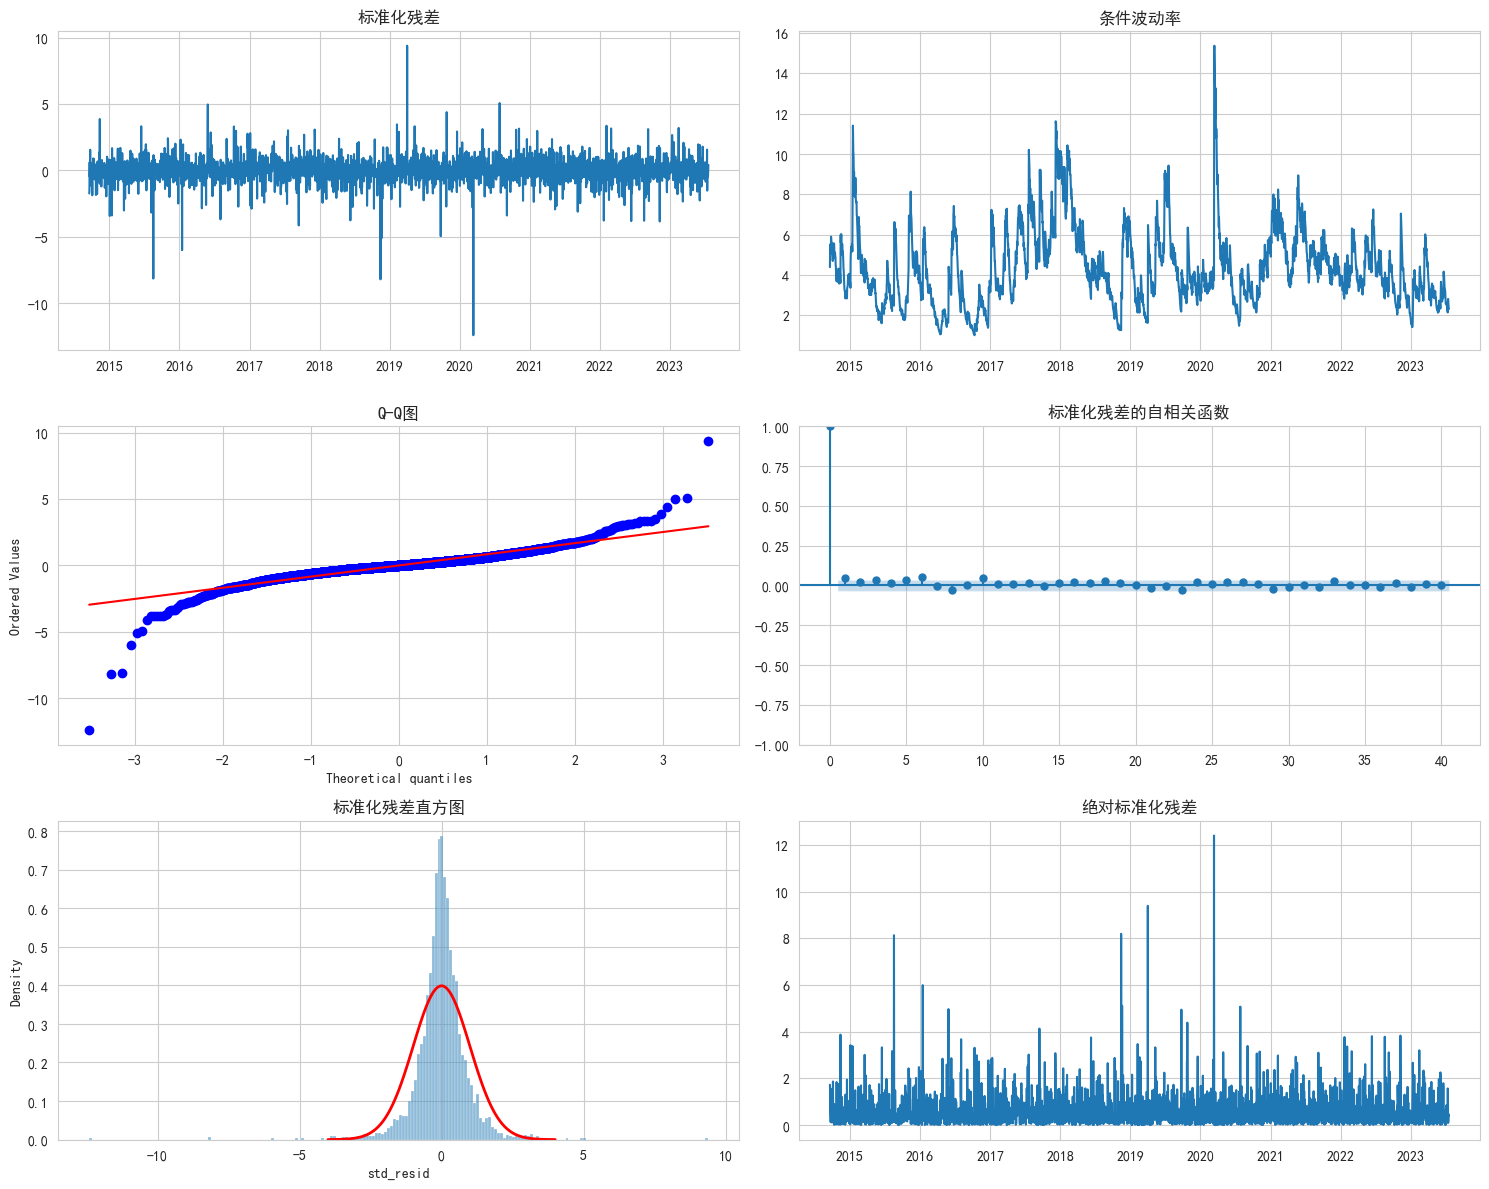


LSTM指标:
{'mse': 1321781.0, 'rmse': 1149.6874, 'mae': 816.1544, 'mape': 2.7468398213386536}

EGARCH诊断结果:
{'ljung_box':       lb_stat  lb_pvalue
10  33.854844   0.000195
15  36.095851   0.001712
20  41.663653   0.003059, 'jarque_bera': {'statistic': 65511.26642240767, 'pvalue': 0.0}, 'arch_effect': {'statistic': 4.701462384577345, 'pvalue': 0.9672145080487187}}

绘制预测结果...


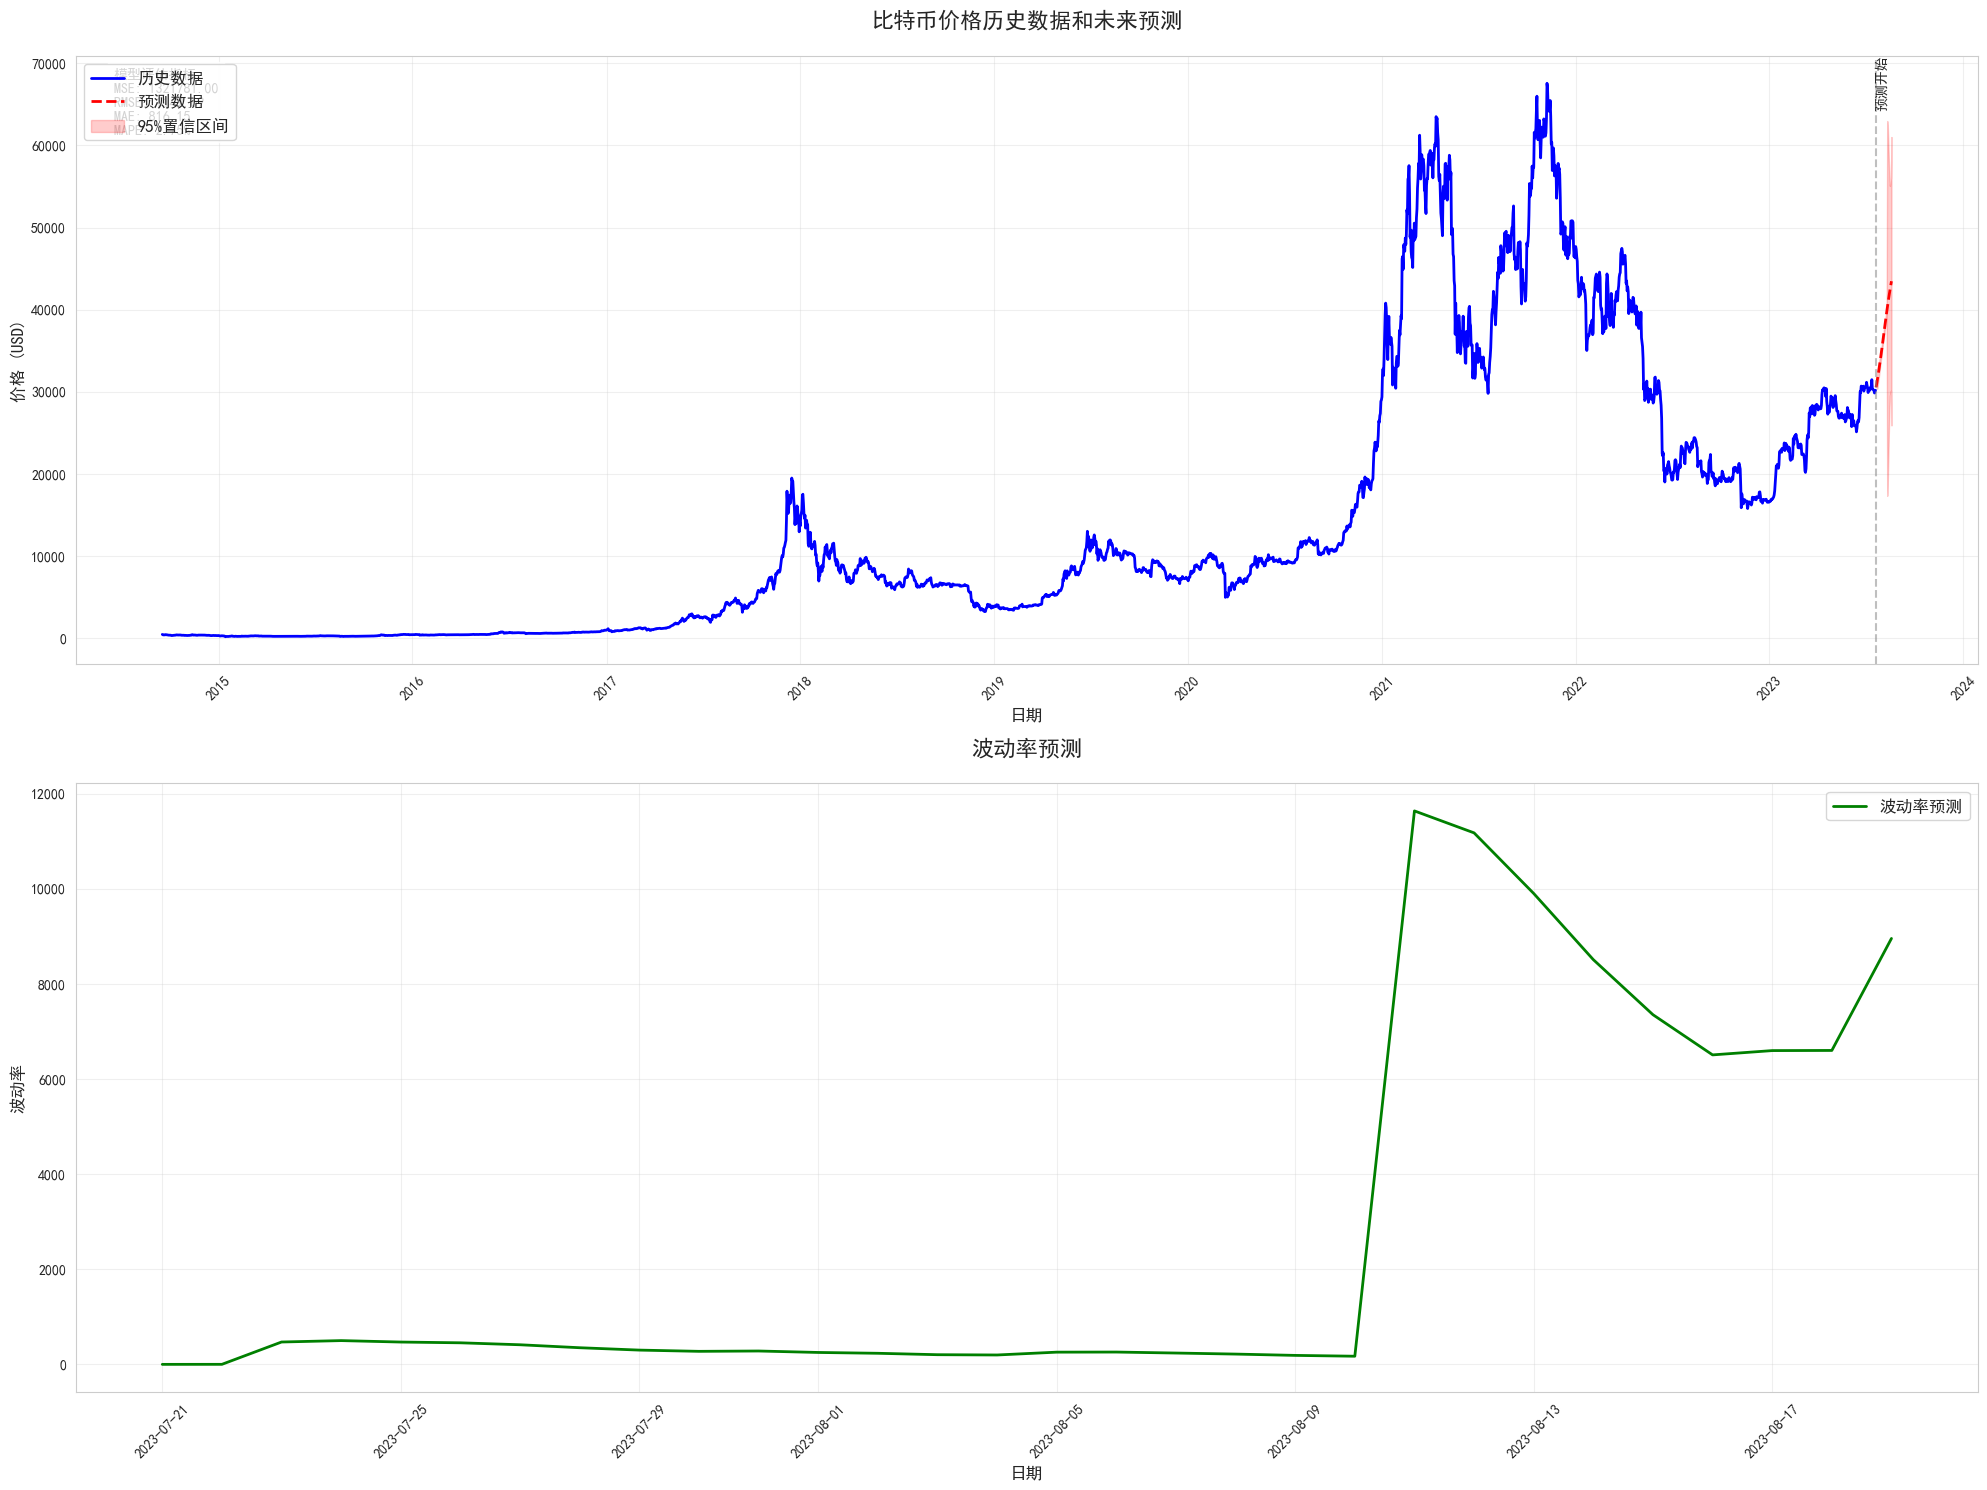


异方差检验结果:
ARCH效应检验统计量: 4.7015
p值: 0.9672
✓ 成功消除异方差性


In [7]:
import pandas as pd
import os
from btc_lstm_handler import BTCLSTMHandler
from btc_egarch_handler import BTCEGARCHHandler, BTCHybridHandler, train_and_evaluate_hybrid_model
from visualization import plot_complete_prediction

def main():
    # 加载数据
    print("加载数据...")
    df = pd.read_csv('data/BTC-USD.csv', index_col='Date', parse_dates=True)

    try:
        # 使用LSTM模型混合模型
        print("\n使用混合模型进行预测...")
        hybrid_handler, eval_results, hybrid_predictions = train_and_evaluate_hybrid_model(df)

        # 输出评估结果
        print("\nLSTM指标:")
        print(eval_results['lstm_metrics'])
        print("\nEGARCH诊断结果:")
        print(eval_results['egarch_diagnostics'])

        # 预测可视化
        future_dates = pd.date_range(
            start=df.index[-1] + pd.Timedelta(days=1),
            periods=30,
            freq='D'
        )

        # 绘制结果
        print("\n绘制预测结果...")
        plot_complete_prediction(
            df,
            future_dates,
            hybrid_predictions.mean,
            confidence_intervals=(hybrid_predictions.lower_bound, hybrid_predictions.upper_bound),
            metrics=eval_results['lstm_metrics'],
            volatility=hybrid_predictions.volatility
        )

        # 检查异方差
        arch_test = eval_results['egarch_diagnostics']['arch_effect']
        print("\n异方差检验结果:")
        print(f"ARCH效应检验统计量: {arch_test['statistic']:.4f}")
        print(f"p值: {arch_test['pvalue']:.4f}")

        if arch_test['pvalue'] > 0.05:
            print("✓ 成功消除异方差性")
        else:
            print("! 仍存在异方差性，可能需要调整模型参数")

    except Exception as e:
        print(f"运行过程中出现错误: {str(e)}")
        raise

if __name__ == "__main__":
    main()

加载数据...
初始化分析器...
数据预处理...
发现缺失值:
 d_log_price     1
d_log_volume    1
dtype: int64

绘制原始序列基础分析图...


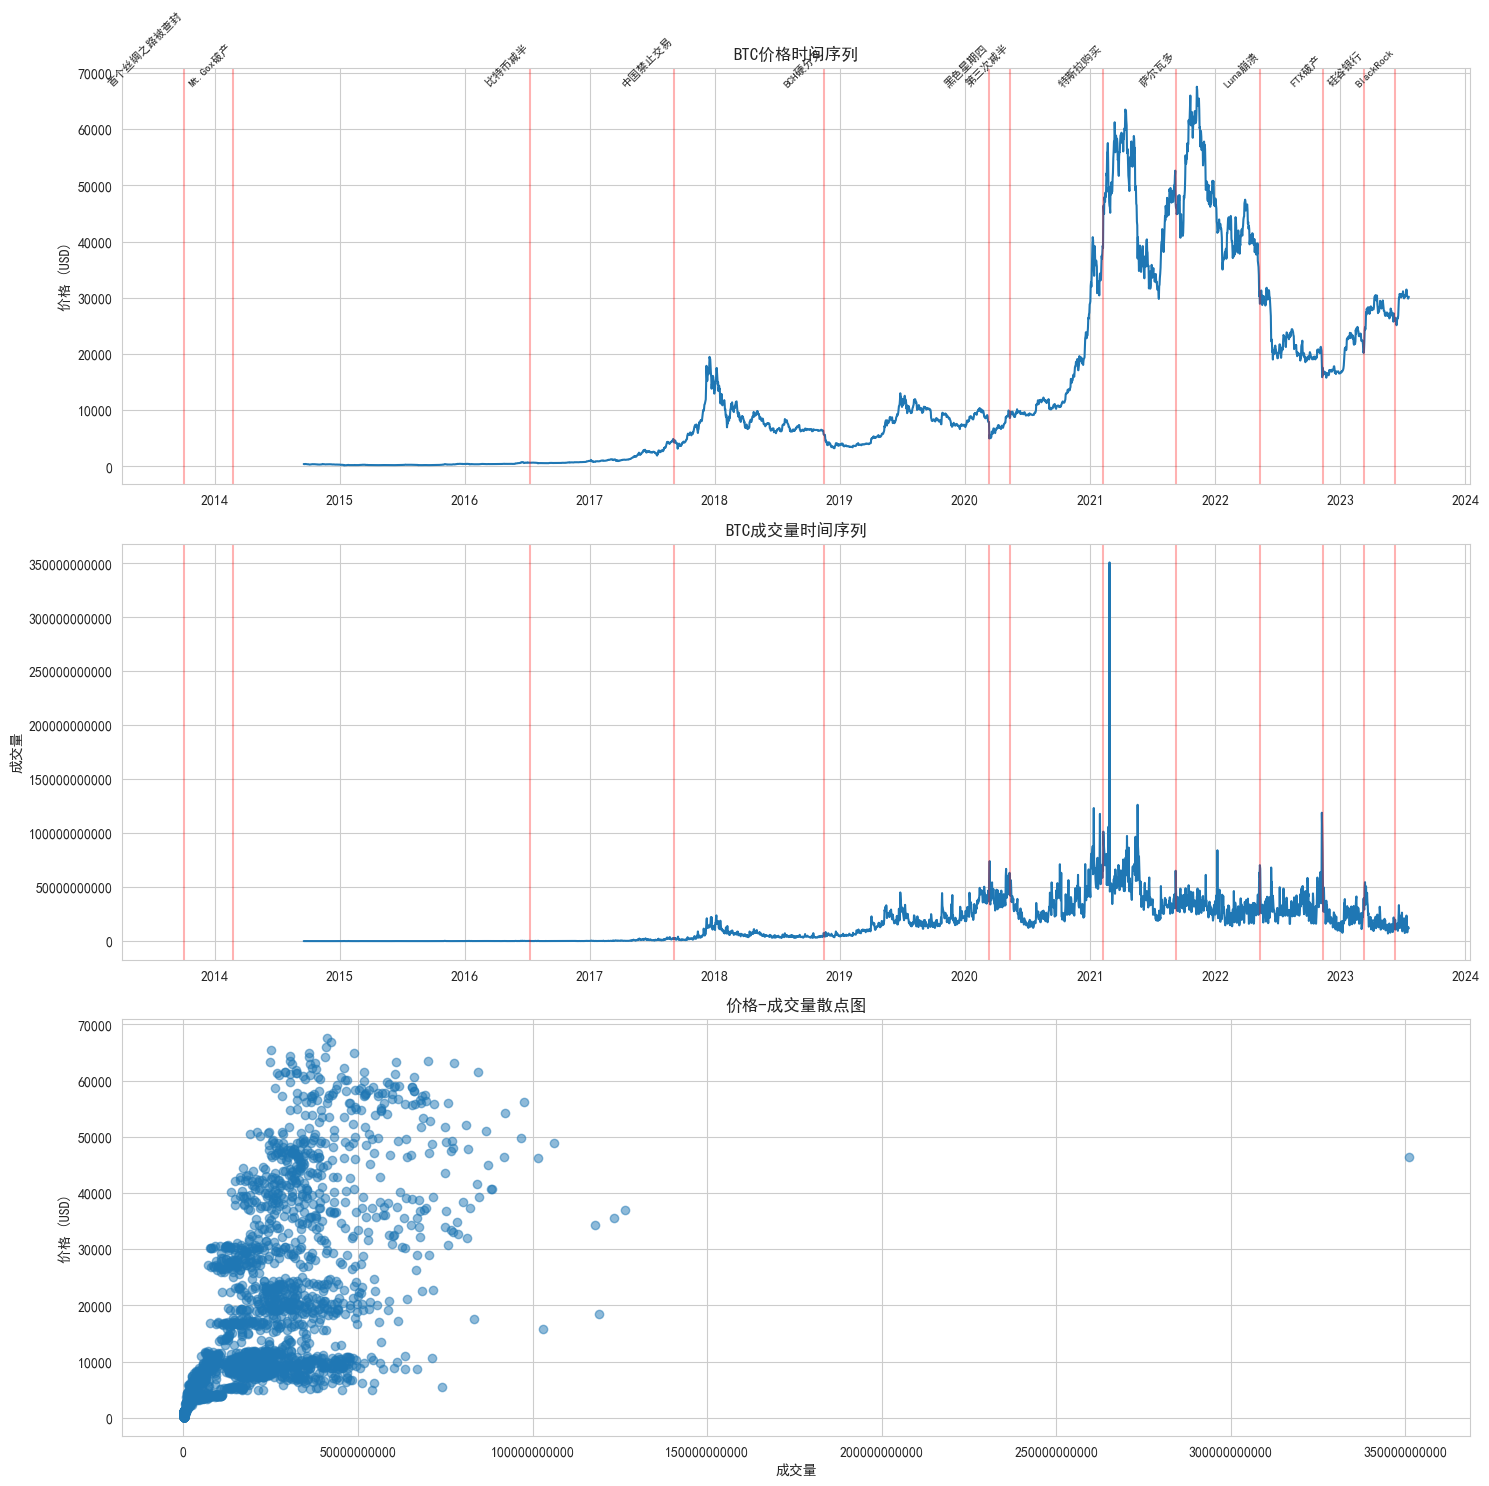


执行平稳性检验...

平稳性检验结果:

Close:
ADF统计量: -1.5406
p值: 0.5133
临界值:
	1%: -3.4324
	5%: -2.8624
	10%: -2.5673

Volume:
ADF统计量: -2.1898
p值: 0.2100
临界值:
	1%: -3.4324
	5%: -2.8624
	10%: -2.5673

执行Johansen协整检验...

协整检验结果:
特征值: [0.0225096  0.00032843]

迹统计量和临界值:
H0: r <= 0
迹统计量: 74.4823
临界值: [13.4294 15.4943 19.9349]
H0: r <= 1
迹统计量: 1.0593
临界值: [2.7055 3.8415 6.6349]

执行Granger因果检验...

Granger因果检验p值:

价格→交易量:
滞后3期: 0.0263 (显著)
滞后4期: 0.0024 (显著)
滞后5期: 0.0010 (显著)
滞后6期: 0.0000 (显著)

交易量→价格:

估计误差修正模型...

协整方程结果:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5091      0.073    -62.086      0.000      -4.651      -4.367
log_volume     0.5968      0.003    180.385      0.000       0.590       0.603

ECM估计结果:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

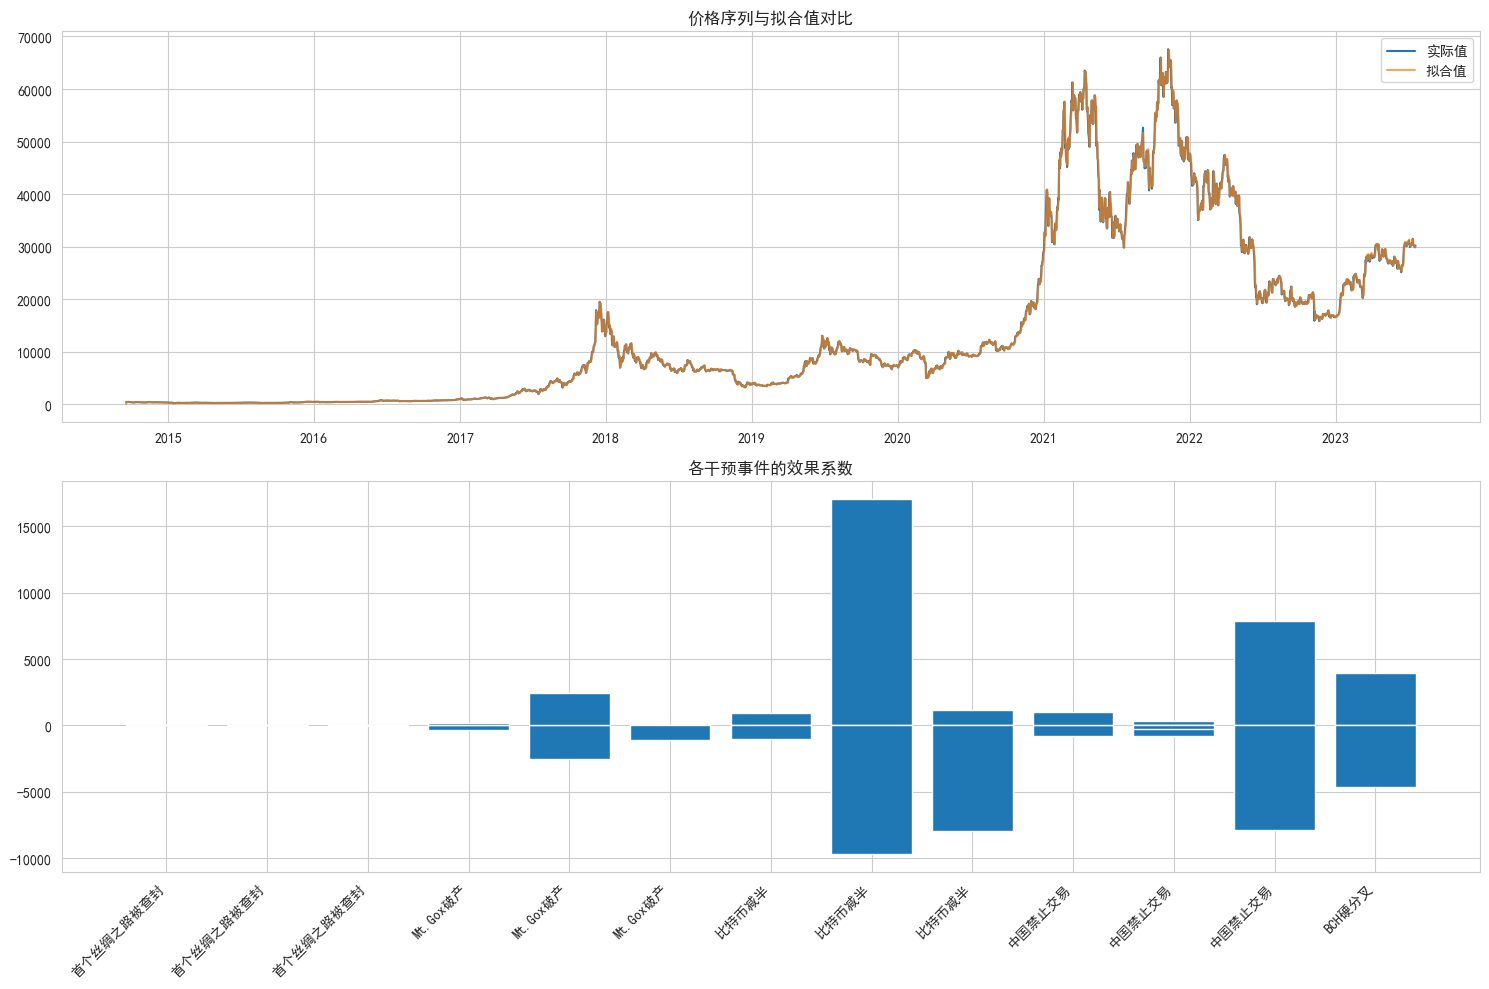

In [1]:
import pandas as pd
import numpy as np
from multivariate_analysis import BTCMultivariateAnalysis
from events import events
import warnings
warnings.filterwarnings('ignore')  # 忽略警告信息
def main():
    """主函数"""
    try:
        # 加载数据
        print("加载数据...")
        df = pd.read_csv('data/BTC-USD.csv', index_col='Date', parse_dates=True)

        # 初始化分析器
        print("初始化分析器...")
        analyzer = BTCMultivariateAnalysis(df, events)

        # 数据预处理
        print("数据预处理...")
        df_processed = analyzer.preprocess_data()

        # 绘制初始分析图
        print("\n绘制原始序列基础分析图...")
        analyzer.plot_initial_analysis()

        # 1. 平稳性检验
        print("\n执行平稳性检验...")
        stationarity_results = analyzer.check_stationarity()
        print("\n平稳性检验结果:")
        for variable, results in stationarity_results.items():
            print(f"\n{variable}:")
            print(f"ADF统计量: {results['adf_statistic']:.4f}")
            print(f"p值: {results['p_value']:.4f}")
            print("临界值:")
            for key, value in results['critical_values'].items():
                print(f"\t{key}: {value:.4f}")

        # 2. 协整检验
        print("\n执行Johansen协整检验...")
        coint_results = analyzer.cointegration_test()
        if coint_results:
            print("\n协整检验结果:")
            print(f"特征值: {coint_results['eigenvalues']}")
            print("\n迹统计量和临界值:")
            for i, (trace, cvs) in enumerate(zip(coint_results['trace_stat'],
                                                 coint_results['crit_vals'])):
                print(f"H0: r <= {i}")
                print(f"迹统计量: {trace:.4f}")
                print(f"临界值: {cvs}")

        # 3. Granger因果检验
        print("\n执行Granger因果检验...")
        causality_results = analyzer.granger_causality_test(maxlag=5)
        if causality_results:
            print("\nGranger因果检验p值:")
            print("\n价格→交易量:")
            for lag, pvalue in causality_results['price_to_volume'].items():
                if pvalue < 0.05:
                    print(f"滞后{lag}期: {pvalue:.4f} (显著)")
            print("\n交易量→价格:")
            for lag, pvalue in causality_results['volume_to_price'].items():
                if pvalue < 0.05:
                    print(f"滞后{lag}期: {pvalue:.4f} (显著)")

        # 4. 误差修正模型
        print("\n估计误差修正模型...")
        ecm_results = analyzer.estimate_ecm()
        if ecm_results:
            print("\n协整方程结果:")
            print(ecm_results['coint_eq'].summary().tables[1])
            print("\nECM估计结果:")
            print(ecm_results['ecm'].summary().tables[1])

        # 5. 干预分析
        print("\n执行干预分析...")
        intervention_results = analyzer.intervention_analysis_with_arimax()
        if intervention_results:
            print("\n干预分析结果:")
            model = intervention_results['model']
            print("\nARIMAX模型摘要:")
            print(model.summary().tables[1])

            print("\n重大事件影响分析:")
            effects = intervention_results['intervention_effects']
            for event, effect in effects.items():
                if abs(effect['p_value']) < 0.05:
                    event_name = event.split('_', 1)[1]
                    print(f"\n事件: {event_name}")
                    print(f"影响系数: {effect['coefficient']:.4f}")
                    print(f"显著性(p值): {effect['p_value']:.4f}")
                    print(f"95%置信区间: [{effect['conf_int_lower']:.4f}, {effect['conf_int_upper']:.4f}]")

            # 绘制干预效果图
            print("\n绘制干预效果分析图...")
            analyzer.plot_intervention_effects(intervention_results)

    except Exception as e:
        print(f"\n分析过程中出现错误: {str(e)}")
        raise

if __name__ == "__main__":
    main()